In [27]:
import numpy as np # linear algebra
import pandas as pd 

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model


from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, classification_report


import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.9.1


In [29]:
path = "D:/archive"
lab = pd.read_csv("D:/archive/labels.csv")

In [31]:
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3 #they are rgb so +3 to the standard size of 32 x 32
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory("D:/archive/myData",
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


In [32]:
X , y = data.next()

In [33]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(73139, 32, 32, 3)
Labels shape :(73139, 43)


In [34]:
y.shape

(73139, 43)

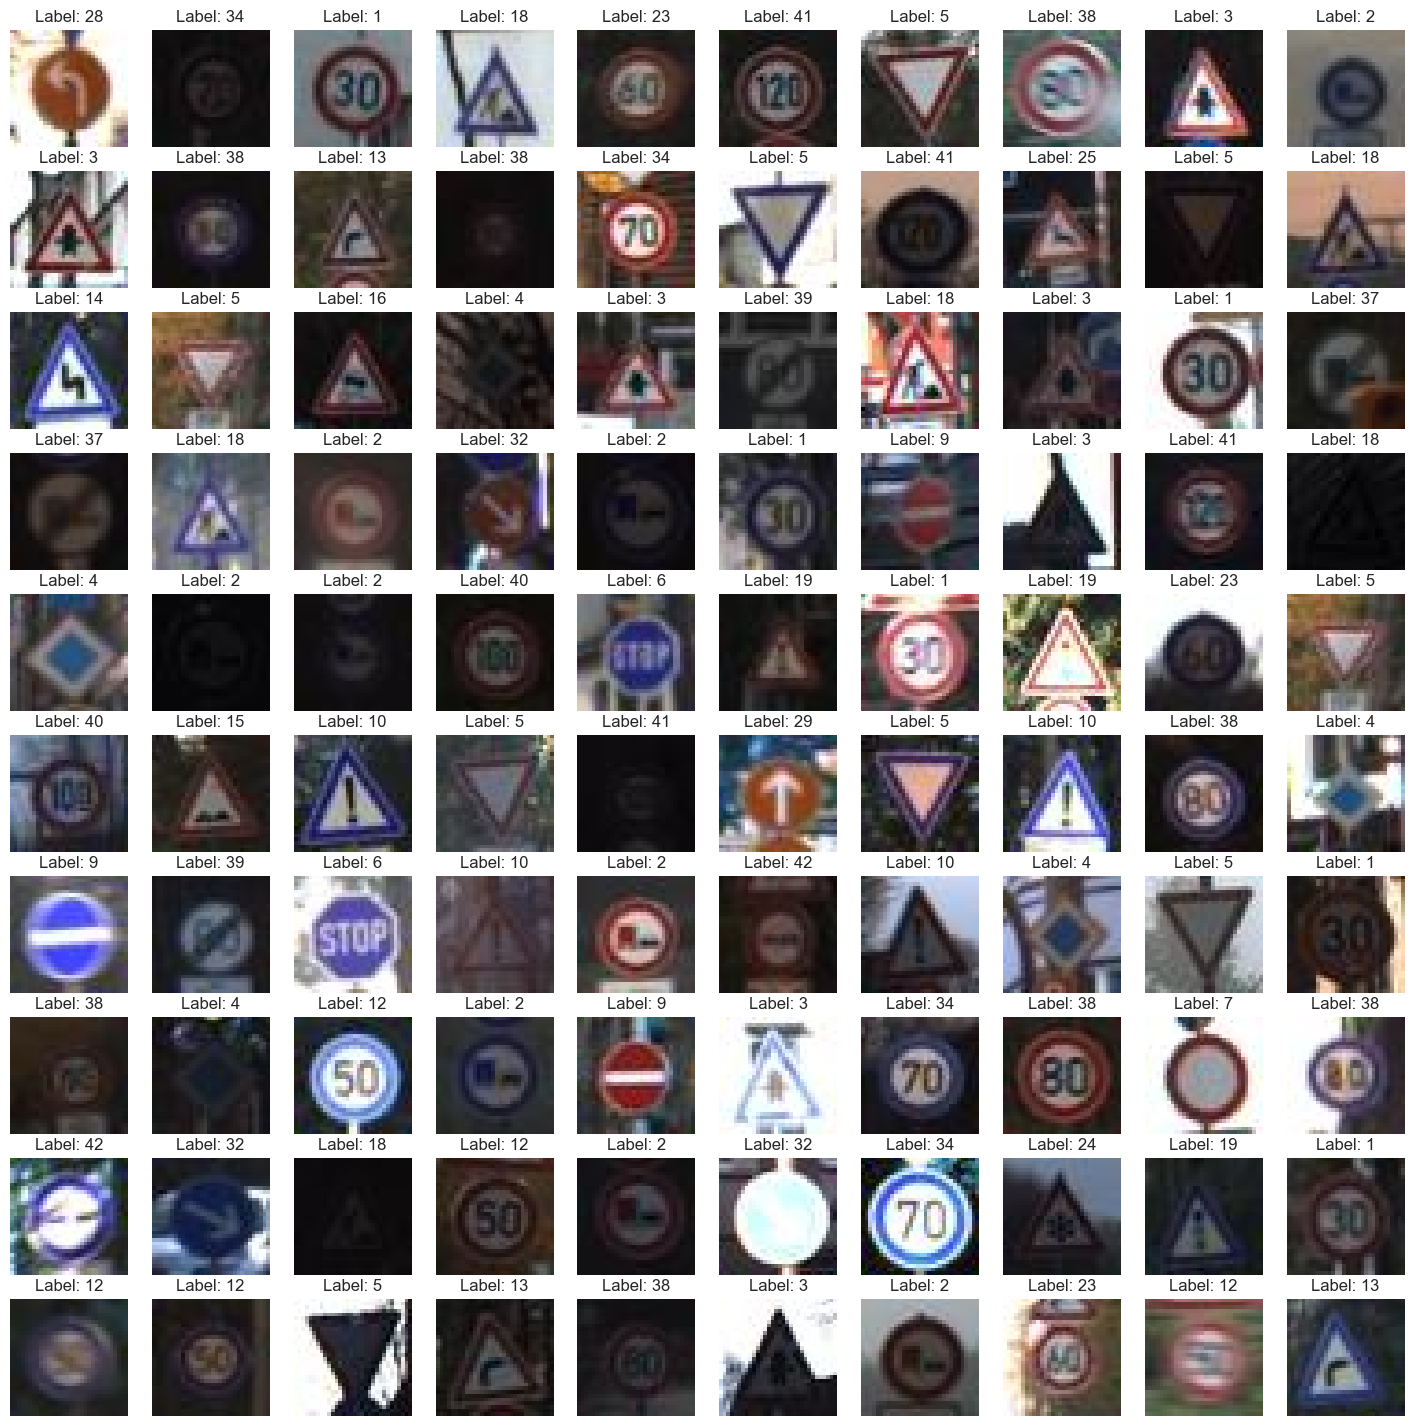

In [35]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (58511, 32, 32, 3)
Test Shape : (14628, 32, 32, 3)


In [37]:
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

In [38]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [41]:

history =  model.fit(X_train, y_train,  batch_size = 32, epochs = 50, verbose = 1, 
              validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
1829/1829 [==============================] - 2111s 1s/step - loss: 3.3129 - accuracy: 0.3524 - val_loss: 1.6206 - val_accuracy: 0.6391 - lr: 0.0010
Epoch 2/50
1829/1829 [==============================] - 2072s 1s/step - loss: 2.1327 - accuracy: 0.5790 - val_loss: 1.2981 - val_accuracy: 0.7635 - lr: 0.0010
Epoch 3/50
1829/1829 [==============================] - 2046s 1s/step - loss: 1.1828 - accuracy: 0.7806 - val_loss: 0.8564 - val_accuracy: 0.7992 - lr: 0.0010
Epoch 4/50
1829/1829 [==============================] - 2051s 1s/step - loss: 0.5307 - accuracy: 0.8619 - val_loss: 0.1393 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 5/50
1829/1829 [==============================] - 2046s 1s/step - loss: 0.3707 - accuracy: 0.9090 - val_loss: 0.1355 - val_accuracy: 0.9584 - lr: 0.0010
Epoch 6/50
1829/1829 [==============================] - 2049s 1s/step - loss: 0.3110 - accuracy: 0.9240 - val_loss: 2.4255 - val_accuracy: 0.7116 - lr: 0.0010
Epoch 7/50
1829/1829 [========================

In [44]:
model.save('D:/tos_dataset/TSC_model.h5')

In [45]:
from tensorflow.keras.models import load_model
modell=load_model('D:/tos_dataset/TSC_model.h5')

In [56]:
img_path="D:/archive/myData/1/00000_00000 - Copie.jpg"
img = image.load_img(img_path, target_size=(32,32))

In [57]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [58]:
img_preprocessed = preprocess_input(img_batch)

In [68]:
predictions= modell.predict(img_preprocessed)

1/1 [==============================] - 0s 386ms/step


In [67]:
from tensorflow.keras.applications.resnet50 import decode_predictions

In [71]:



max_prob_index = np.argmax(predictions)




print("Predicted class:", max_prob_index)

Predicted class: 1


In [61]:
print(prediction)

[[5.0171023e-10 9.9999976e-01 3.3715649e-16 4.3262126e-12 1.5971734e-10
  5.0166668e-12 7.0948862e-13 7.6843108e-11 6.3485512e-18 3.8823504e-16
  4.9321526e-11 2.6280597e-18 2.7330032e-08 1.7080452e-17 9.2048773e-12
  1.2666571e-15 2.6453434e-15 1.3559354e-10 1.1084365e-12 4.1587597e-14
  1.1224568e-12 3.0005330e-13 9.2310916e-12 1.2012640e-11 8.8825220e-15
  4.2957912e-11 2.1367955e-12 8.5840030e-11 3.7195622e-15 1.4925774e-12
  5.2065692e-15 4.9714608e-15 1.7311312e-10 7.6667452e-14 2.5427028e-07
  8.0723574e-11 1.5022307e-16 1.2895972e-14 1.6984295e-09 4.6412331e-12
  1.5890079e-11 6.6696926e-14 3.4589418e-15]]
